<a href="https://colab.research.google.com/github/Akbar-1056/bitlabs-project/blob/main/mid_term_bitlabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Akbar-1056/bitlabs-project.git


Cloning into 'bitlabs-project'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 25.80 KiB | 4.30 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
df = pd.read_csv('/content/drive/MyDrive/data_set_mid_term/midterm_hotel_data.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/data_set_mid_term/midterm_hotel_data.csv'

In [ ]:
# mengisi value data numeric dengan median dan mengubah data float menjadi numeric
numeric_df = df.select_dtypes(include=['number'])
df[numeric_df.columns] = df[numeric_df.columns].fillna(numeric_df.median())
df['adults'] = df['adults'].fillna(df['adults'].median())

#mengisi data kategorical
df['country'] = df['country'].fillna('Unknown')

# hapus kolom index bawaan
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print(df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0      342.0               2015   
1       Resort Hotel            0      737.0               2015   
2       Resort Hotel            0        7.0               2015   
3       Resort Hotel            0       13.0               2015   
4       Resort Hotel            0        0.0               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0       23.0               2017   
119386    City Hotel            0        0.0               2017   
119387    City Hotel            0        0.0               2017   
119388    City Hotel            0      109.0               2017   
119389    City Hotel            0      205.0               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [ ]:
# Mengubah seluruh kolom teks menjadi huruf kecil
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

# Menampilkan dataset setelah perubahan
print(df.head())


<ipython-input-5-7a5d4dc961c0>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda s: s.lower() if type(s) == str else s)


   Unnamed: 0         hotel  is_canceled  lead_time  arrival_date_year  \
0           0  resort hotel            0      342.0               2015   
1           1  resort hotel            0      737.0               2015   
2           2  resort hotel            0        7.0               2015   
3           3  resort hotel            0       13.0               2015   
4           4  resort hotel            0        0.0               2015   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0               july                        27                          1   
1               july                        27                          1   
2               july                        27                          1   
3               july                        27                          1   
4               july                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  ...  customer_type   adr  \
0             

In [ ]:
# Normalisasi teks untuk seluruh kolom teks (semua huruf kecil dan hapus spasi tambahan)
df_cleaned = df.applymap(lambda s: s.lower().strip() if type(s) == str else s)

# Memeriksa nilai unik di kolom teks tertentu untuk melihat inkonsistensi
for col in df_cleaned.select_dtypes(include='object'):
    print(f"Unique values in {col}: {df_cleaned[col].unique()[:10]}")  # Tampilkan hanya 10 pertama



<ipython-input-8-e6a9cbf7a12b>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(lambda s: s.lower().strip() if type(s) == str else s)


Unique values in hotel: ['resort hotel' 'city hotel']
Unique values in arrival_date_month: ['july' 'august' 'september' 'october' 'november' 'december' 'january'
 'february' 'march' 'april']
Unique values in meal: ['bb' 'fb' 'hb' 'sc' 'undefined']
Unique values in country: ['prt' 'gbr' 'usa' 'esp' 'irl' 'fra' nan 'rou' 'nor' 'omn']
Unique values in market_segment: ['direct' 'corporate' 'online ta' 'offline ta/to' 'complementary' 'groups'
 'undefined' 'aviation']
Unique values in distribution_channel: ['direct' 'corporate' 'ta/to' 'undefined' 'gds']
Unique values in reserved_room_type: ['c' 'a' 'd' 'e' 'g' 'f' 'h' 'l' 'p' 'b']
Unique values in assigned_room_type: ['c' 'a' 'd' 'e' 'g' 'f' 'i' 'b' 'h' 'p']
Unique values in deposit_type: ['no deposit' 'refundable' 'non refund']
Unique values in customer_type: ['transient' 'contract' 'transient-party' 'group']
Unique values in reservation_status: ['check-out' 'canceled' 'no-show']
Unique values in reservation_status_date: ['2015-07-01' '201

<ipython-input-19-68beb37dc41b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_valid_date', data=df, palette='coolwarm')


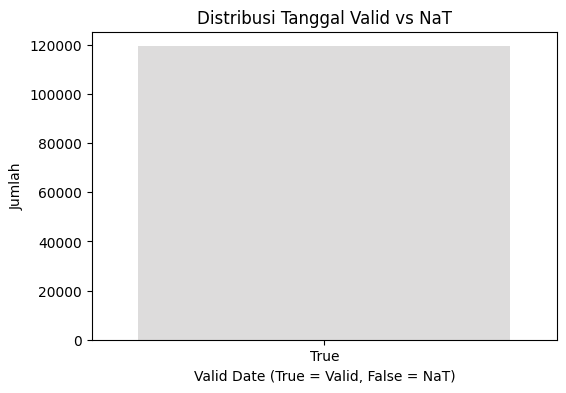

In [ ]:
# Menambahkan kolom baru yang menyatakan apakah tanggal valid atau NaT
df['is_valid_date'] = df['arrival_date_year'].notnull()

# Visualisasi distribusi antara valid dates dan NaT
plt.figure(figsize=(6, 4))
sns.countplot(x='is_valid_date', data=df, palette='coolwarm')
plt.title("Distribusi Tanggal Valid vs NaT")
plt.xlabel("Valid Date (True = Valid, False = NaT)")
plt.ylabel("Jumlah")
plt.show()


In [ ]:
# Mengganti NaN dengan median untuk semua kolom numerik
numeric_df = df.select_dtypes(include=['number']) # Seleksi kolom numerik saja
df[numeric_df.columns] = df[numeric_df.columns].fillna(numeric_df.median()) # Isi NaN pada kolom numerik dengan median

# Mengganti NaN di kolom kategorikal dengan "unknown"
categorical_df = df.select_dtypes(include=['object'])  # Seleksi kolom kategorikal
df[categorical_df.columns] = df[categorical_df.columns].fillna('unknown')  # Isi NaN pada kolom kategorikal dengan 'unknown'

# Memeriksa jumlah NaN setelah penggantian
print(f"Jumlah NaN setelah penggantian: {df.isnull().sum().sum()}")

# Menyimpan dataset yang sudah diperbarui ke Google Drive
output_file_path = '/content/drive/MyDrive/data_set_mid_term/midterm_hotel_data.csv'
df.to_csv(output_file_path, index=False)

print(f"Dataset yang sudah diperbarui disimpan di: {output_file_path}")

Jumlah NaN setelah penggantian: 0
Dataset yang sudah diperbarui disimpan di: /content/drive/MyDrive/data_set_mid_term/midterm_hotel_data.csv


In [ ]:
# Filter data dengan is_canceled == 1
df_canceled = df[df['is_canceled'] == 1]

# Hitung total lead_time dan jumlah data yang dibatalkan
total_lead_time = df_canceled['lead_time'].sum()
total_canceled = len(df_canceled)

# Hitung rasio
if total_canceled > 0:
    rasio = total_lead_time / total_canceled
else:
    rasio = 0

print(f"Rasio antara lead_time dengan jumlah hari reservasi yang dibatalkan: {rasio}")


Rasio antara lead_time dengan jumlah hari reservasi yang dibatalkan: 122.08967981186686


hotel               City Hotel  Resort Hotel
arrival_date_month                          
April               106.583017     82.982103
August              108.852327    159.288572
December             90.657311     77.976597
February             87.962268     67.704737
January              86.729901     63.480848


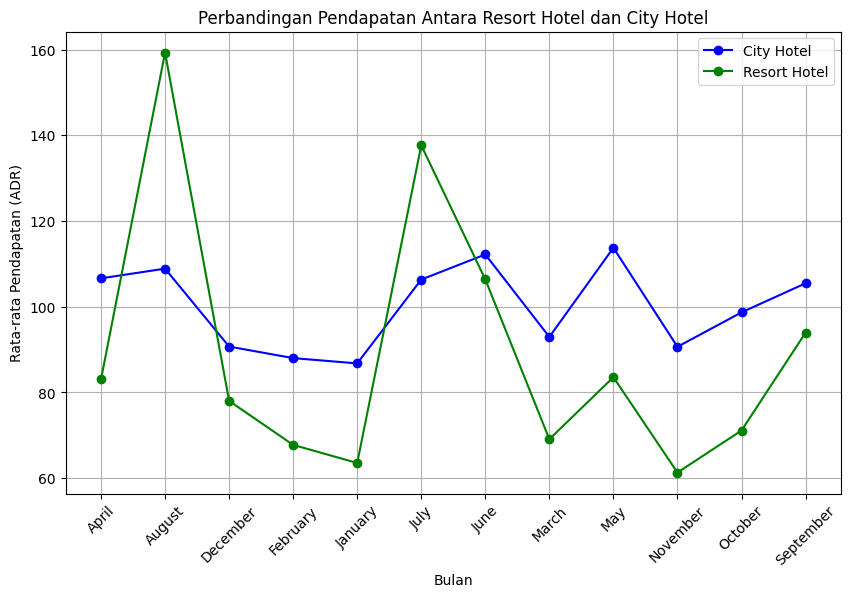

In [ ]:


# Mengelompokkan data berdasarkan tipe hotel dan bulan
monthly_revenue = df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().unstack()

# Pastikan data sudah benar
print(monthly_revenue.head())  # Ini untuk melihat apakah hasilnya sesuai

# Membuat line chart
plt.figure(figsize=(10, 6))

# Plot untuk setiap tipe hotel
plt.plot(monthly_revenue.index, monthly_revenue['City Hotel'], marker='o', color='blue', label='City Hotel')
plt.plot(monthly_revenue.index, monthly_revenue['Resort Hotel'], marker='o', color='green', label='Resort Hotel')

# Tambahkan label dan judul
plt.title('Perbandingan Pendapatan Antara Resort Hotel dan City Hotel')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Pendapatan (ADR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Tampilkan plot
plt.show()


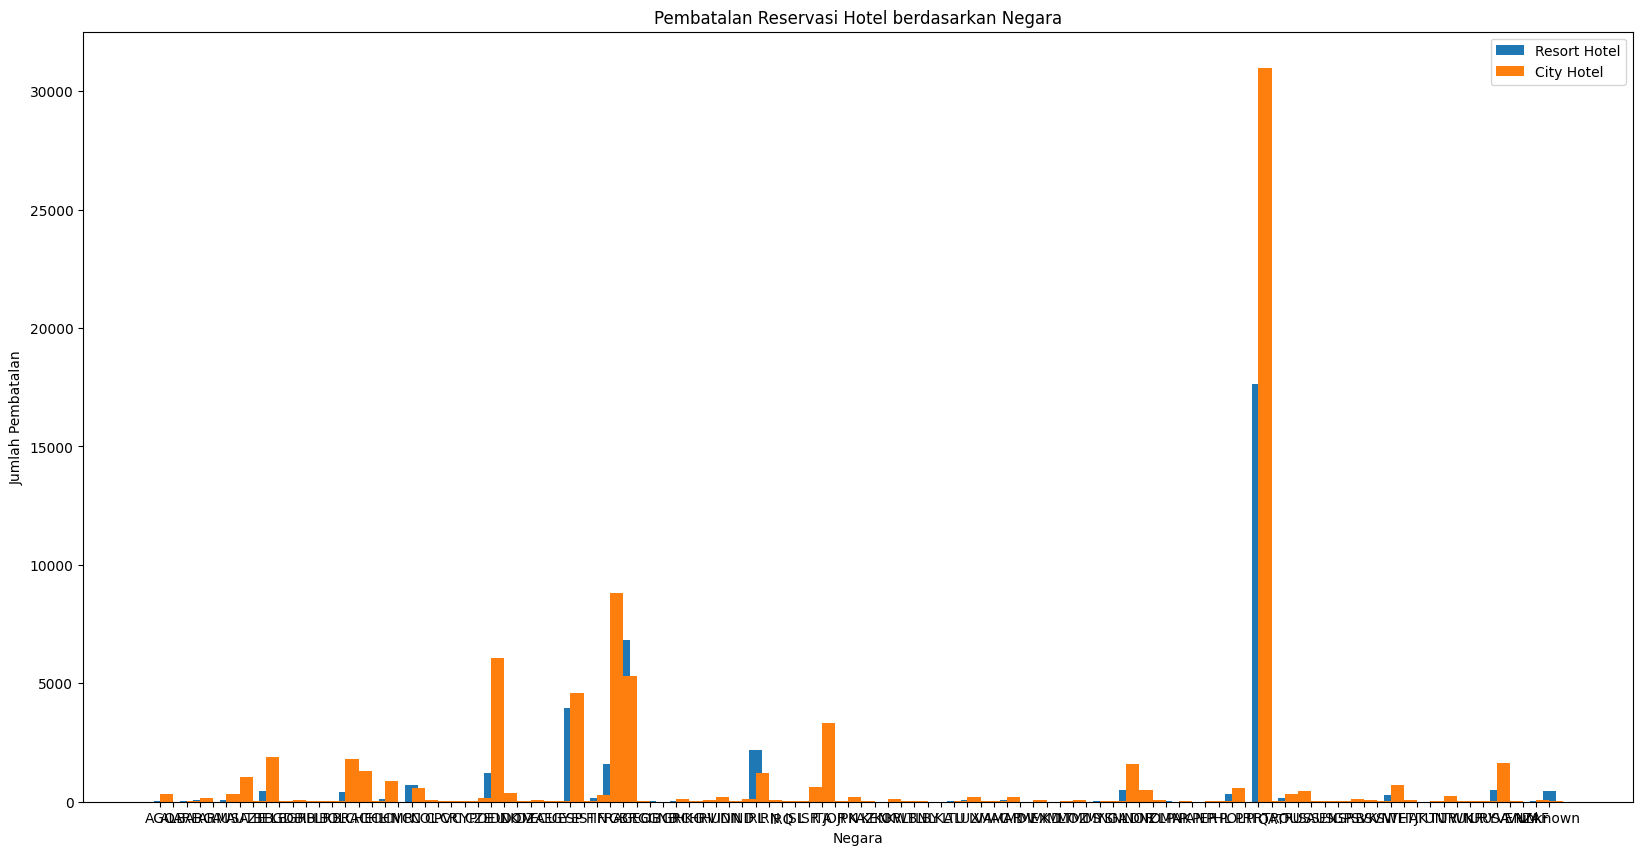

In [ ]:
# Filter data untuk pembatalan
canceled_data = df[df['is_canceled'] == 1]

# Menghitung jumlah pembatalan per negara dan hotel
cancel_counts = canceled_data.groupby(['country', 'hotel']).size().unstack().fillna(0)

# Mengambil 10 negara dengan pembatalan tertinggi
top_countries = cancel_counts.sum(axis=1).nlargest(10).index
top_cancel_counts = cancel_counts.loc[top_countries]

# Plot data dalam bentuk stacked bar chart
top_cancel_counts.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'])
plt.title("Top 10 Countries by Reservation Cancellations and Hotel Type")
plt.xlabel("Country")
plt.ylabel("Number of Cancellations")
plt.legend(title="Hotel Type")
plt.xticks(rotation=45)
plt.show()


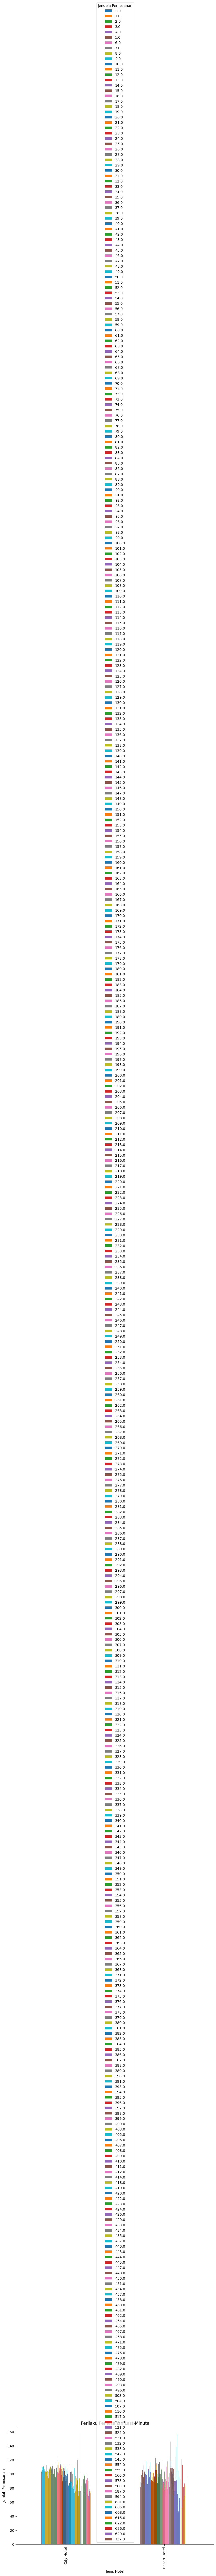

In [ ]:
# Definisikan last minute booking sebagai lead_time <= 7 hari
df['is_last_minute'] = df['lead_time'] <= 7

# Hitung jumlah pemesanan last minute dan non-last minute
last_minute_counts = df['is_last_minute'].value_counts()

# Plot data dalam bentuk bar chart
last_minute_counts.index = ['Last Minute (≤ 7 days)', 'Regular (> 7 days)']
last_minute_counts.plot(kind='bar', color=['#ff7f0e', '#1f77b4'])
plt.title("Last Minute vs Regular Bookings")
plt.xlabel("Booking Type")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Pisahkan data menjadi dua grup berdasarkan jenis hotel
city_hotel_adr = df[df['hotel'] == 'City Hotel']['adr']
resort_hotel_adr = df[df['hotel'] == 'Resort Hotel']['adr']

# 1. Uji normalitas dengan Kolmogorov-Smirnov
city_normal_ks = stats.kstest(city_hotel_adr, 'norm').pvalue > 0.05
resort_normal_ks = stats.kstest(resort_hotel_adr, 'norm').pvalue > 0.05

# 2. Memilih uji statistik berdasarkan hasil uji normalitas
if city_normal_ks and resort_normal_ks:
    # Jika data berdistribusi normal, gunakan t-test
    t_stat, p_value = stats.ttest_ind(city_hotel_adr, resort_hotel_adr)
    test_used = "t-test"
else:
    # Jika data tidak normal, gunakan Mann-Whitney U test
    t_stat, p_value = stats.mannwhitneyu(city_hotel_adr, resort_hotel_adr)
    test_used = "Mann-Whitney U test"

# 3. Interpretasi hasil
alpha = 0.05  # Tingkat signifikansi
if p_value < alpha:
    print(f"Hasil {test_used} menunjukkan p-value = {p_value:.4f}. Tolak H0: Ada perbedaan rata-rata adr antara City Hotel dan Resort Hotel.")
else:
    print(f"Hasil {test_used} menunjukkan p-value = {p_value:.4f}. Gagal menolak H0: Tidak ada perbedaan rata-rata adr yang signifikan antara City Hotel dan Resort Hotel.")